In [ ]:
 # import the packages
import os
from os import getcwd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2
import pandas as pd
import glob
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.cm as cm

#import the tf
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

from keras.preprocessing import image
import glob
import cv2 as cv
import statistics

#Metrics
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Check TensorFlow Version
print('TF version: {}' .format(tf.__version__))

TF version: 2.9.2


In [ ]:
pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 6.9 MB/s 
     |████████████████████████████████| 1.6 MB 21.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=245e8aafec98ccb05c53b7c75955ba5bd4ecea33f27436dcfc741f079b5ae295
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the trained model
from tensorflow import keras
reconstructed_model = keras.models.load_model("./drive/My Drive/Priyanka_new_savedmodel.h5")
reconstructed_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1024, 1024,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, 1024, 1024,   1568        ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 1024, 1024,   16416       ['conv2d[0][0]']                 
                                32)                                                           

In [ ]:
#printing the layers with index and name
for i, layer in enumerate(reconstructed_model.layers):
    print(i, layer.name)

0 input_1
1 conv2d
2 conv2d_1
3 max_pooling2d
4 conv2d_2
5 conv2d_3
6 max_pooling2d_1
7 conv2d_4
8 conv2d_5
9 max_pooling2d_2
10 conv2d_6
11 conv2d_7
12 max_pooling2d_3
13 conv2d_8
14 conv2d_9
15 conv2d_transpose
16 concatenate
17 conv2d_10
18 conv2d_11
19 conv2d_transpose_1
20 concatenate_1
21 conv2d_12
22 conv2d_13
23 conv2d_transpose_2
24 concatenate_2
25 conv2d_14
26 conv2d_15
27 conv2d_transpose_3
28 concatenate_3
29 conv2d_16
30 conv2d_17
31 conv2d_18


In [ ]:
last_conv_layer_name = 'conv2d_18'

In [ ]:
target_size = (1024, 1024)

In [ ]:
#For multiple :

#function to get the img tensor

all_img_tensor = []
def get_img_array(imag_path , target_size):
    img = image.load_img(imag_path , target_size= target_size)
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor , axis = 0)
    img_tensor /= 255
    all_img_tensor.append(img_tensor)
    #print(img_tensor.shape)
    return all_img_tensor

In [ ]:
#get the image tensors of all iamges via the function call 
all_img_array = []
path = '/content/drive/MyDrive/updated_images/test/SampleImages/*.jpg'
for i in glob.glob(path):
  all_img_array= get_img_array(i, target_size)

print(len(all_img_array))

85


In [ ]:
#Save the tensors in a file
np.save("/content/drive/MyDrive/all_img_array.npy" , all_img_array)

In [ ]:
#load the tensors from the file
all_img_array = np.load("/content/drive/MyDrive/all_img_array.npy")
all_img_array.shape

(85, 1, 1024, 1024, 3)

In [ ]:
#function to get the activations of the last layer for all the images
all_activations = []
last_layer_activations = []
def get_activation(all_img_array, reconstructed_model, last_conv_layer_name):
    for i in range(len(all_img_array)):
      activation_model = Model([reconstructed_model.inputs], [reconstructed_model.get_layer(last_conv_layer_name).output, reconstructed_model.output])
      activations = activation_model(all_img_array[i])
      all_activations.append(activations)
      last_layer_activations.append(activations[1])
    
    return last_layer_activations

In [ ]:
all_last_activations = get_activation(all_img_array ,reconstructed_model , last_conv_layer_name)

In [ ]:
len(all_last_activations)

85

In [ ]:
#Save the tensors in a file
all_last_activations = np.save("/content/drive/MyDrive/all_last_activations.npy" , all_last_activations)

In [ ]:
#load the tensors from the file
all_last_activations = np.load("/content/drive/MyDrive/all_last_activations.npy" , allow_pickle=True)

In [ ]:
all_last_activations.shape

(85, 1, 1024, 1024, 1)

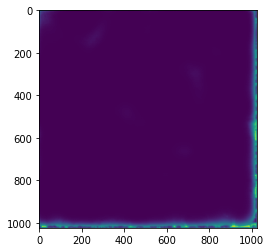

In [ ]:
#save the images to view where the layer has been focusing on an image
new_path = "/content/drive/MyDrive/DownloadedImages_ActivationMaps/"
for i in range(len(all_last_activations)):
        img = all_last_activations[i]
        img = np.squeeze(img) 
        plt.imshow(img)
        plt.savefig(new_path+'Image'+str(i)+'.jpg')

In [ ]:
import os
# get the image path from the drive 
image_names = os.listdir('/content/drive/MyDrive/DownloadedImages_ActivationMaps')

img_url  = []
for each_image in image_names:
   if each_image.endswith(".jpg"):
    full_path = "/content/drive/MyDrive/DownloadedImages_ActivationMaps/" + each_image
    img_url.append(full_path)

In [ ]:
#save the image url to a dataframe
img_url_activationmaps = pd.DataFrame(img_url)
img_url_activationmaps.to_pickle('/content/drive/MyDrive/img_url_activationmaps.pkl')

In [ ]:
from PIL import Image
#get the image object of all the images and append them to the create data
display_array_activationmaps = []
for i in img_url:
  image_path =  Image.open(i)
  display_array_activationmaps.append(image_path)

In [ ]:
len(display_array_activationmaps)

85

In [ ]:
#flattened the images to get the values for the scatter plot 
numarr_activationmaps = []

for i in range(len(all_last_activations)):
  p = all_last_activations[i].flatten()
  numarr_activationmaps.append(p)

In [ ]:
len(numarr_activationmaps)

85

In [ ]:
numarr_activationmaps = np.asarray(numarr_activationmaps)
print(type(numarr_activationmaps))
numarr_activationmaps.shape

<class 'numpy.ndarray'>


(85, 1048576)

In [ ]:
#Save the final Array
numarr_activationmaps = np.save("/content/drive/MyDrive/numarr_activationmaps.npy" ,numarr_activationmaps)

In [ ]:
#load the array
numarr_activationmaps = np.load("/content/drive/MyDrive/numarr_activationmaps.npy")

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
pca.fit(numarr_activationmaps)
data_pca_activationmaps = pca.transform(numarr_activationmaps)
print("original shape:   ", numarr_activationmaps.shape)
print("transformed shape:", data_pca_activationmaps.shape)

original shape:    (85, 1048576)
transformed shape: (85, 2)


In [ ]:
data_pca_activationmaps_df = pd.DataFrame(data_pca_activationmaps)
#create a pickle file to save the dataframe
data_pca_activationmaps_df.to_pickle("/content/drive/MyDrive/data_pca_activationmaps_df.pkl")

In [ ]:
#read the pickle file
data_pca_activationmaps_df = pd.read_pickle("/content/drive/MyDrive/data_pca_activationmaps_df.pkl")

In [ ]:
df_activationmaps= pd.DataFrame(data_pca_activationmaps_df)
df_activationmaps['image_url'] = display_array_activationmaps

df_activationmaps = df_activationmaps.rename(columns ={ 0: "column1", 1: "column2"})
df_activationmaps.head(5)

,column1,column2,image_url
0,-26.042202,2.994179,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,-21.637129,2.161066,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,-17.800360,-10.316444,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,-25.892292,3.292757,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,-24.678165,2.373397,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [ ]:
#create a pickle file to save the dataframe
df_activationmaps.to_pickle("/content/drive/MyDrive/df_activationmaps.pkl")

In [ ]:
#read the pickle file
df_activationmaps = pd.read_pickle("/content/drive/MyDrive/df_activationmaps.pkl")

In [ ]:
#https://stackoverflow.com/questions/70050831/plotly-dash-scatter-plot-pointnumber-is-assigned-to-multiple-points-in-hover-da
#https://community.plotly.com/t/how-to-embed-images-into-a-dash-app/61839

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output, no_update
import plotly.express as px


# Setup plotly scatter plot
fig = px.scatter(x= df_activationmaps['column1'], y=df_activationmaps['column2'] , color = df_activationmaps['column1'], labels=dict( x ="Principal Component 1", y ="Principal Component 2") , color_continuous_scale='viridis' )

fig.update_traces(hoverinfo="none", hovertemplate=None)


# Setup Dash
app = JupyterDash(__name__)
app.layout = html.Div(className="container",
                      children=[dcc.Graph(id="graph-5", figure=fig, clear_on_unhover=True),
                                dcc.Tooltip(id="graph-tooltip-5", direction="bottom")])

@app.callback(Output("graph-tooltip-5", "show"),
              Output("graph-tooltip-5", "bbox"),
              Output("graph-tooltip-5", "children"),
              Input("graph-5", "hoverData"))

def display_hover(hoverData):
    if hoverData is None:
        return False, no_update, no_update
    

    hover_data = hoverData["points"][0]
    bbox = hover_data["bbox"]
    num = hover_data["pointNumber"]

    
    df_row = df_activationmaps.iloc[num]
    img_src = df_row['image_url']
   
   
    children = [
        html.Div([
            html.Img(src=img_src, style={"width": "100%"})
        ], style={'width': '100px', 'white-space': 'normal'})
    ]

    return True, bbox, children

if __name__ == "__main__":
    app.run_server(mode="inline", debug=True)

<IPython.core.display.Javascript object>

In [ ]:
# Kmeans clustering

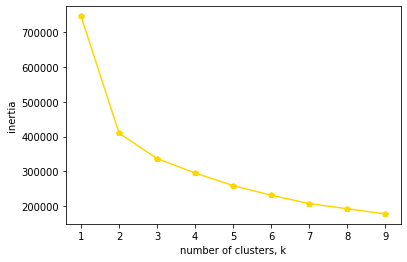

In [ ]:
#https://365datascience.com/tutorials/python-tutorials/pca-k-means/

from sklearn.cluster import KMeans
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(numarr_activationmaps)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

In [ ]:
# With 2 Clusters

In [ ]:
model = KMeans(n_clusters=2)
model.fit(numarr_activationmaps)
labels_clus2 = model.predict(numarr_activationmaps)

In [ ]:
data_pca_activationmaps_df_cluster2 = data_pca_activationmaps_df
data_pca_activationmaps_df_cluster2['labels_clus2'] = labels_clus2

In [ ]:
data_pca_activationmaps_df_cluster2.to_pickle('/content/drive/MyDrive/data_pca_activationmaps_df_cluster2.pkl')

In [ ]:
data_pca_activationmaps_df_cluster2 = pd.read_pickle('/content/drive/MyDrive/data_pca_activationmaps_df_cluster2.pkl')

In [ ]:
# Calculate Silhoutte Score
score = silhouette_score(data_pca_activationmaps_df_cluster2,  data_pca_activationmaps_df_cluster2['labels_clus2'] , metric='euclidean')

#range -1 to 1 , 0 means overlapping data , positive means the cluster is dense and well-separated than other clusters , negative means the daa might be wrongly assigned. 
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.855


In [ ]:
import os
# get the image path from the drive 
image_names = os.listdir('/content/drive/MyDrive/updated_images/test/SampleImages/')

img_url_kmean  = []
for each_image in image_names:
   if each_image.endswith(".jpg"):
    full_path_kmean = "/content/drive/MyDrive/updated_images/test/SampleImages/" + each_image
    img_url_kmean.append(full_path_kmean)

In [ ]:
from PIL import Image
#get the image object of all the images and append them to the create data
display_kmean_activations_img_url = []
for i in img_url_kmean:
  image_path_kmean =  Image.open(i)
  display_kmean_activations_img_url.append(image_path_kmean)

In [ ]:
display_kmean_activations_img_url = pd.DataFrame(display_kmean_activations_img_url)
display_kmean_activations_img_url.to_pickle('/content/drive/MyDrive/display_kmean_activations_img_url.pkl')

In [ ]:
display_kmean_activations_img_url= pd.read_pickle('/content/drive/MyDrive/display_kmean_activations_img_url.pkl')

In [ ]:
data_pca_activationmaps_df_cluster2['img_url'] = display_kmean_activations_img_url

In [ ]:
sample1 = data_pca_activationmaps_df_cluster2.sample(n = 25)

In [ ]:
sample1

,0,1,labels_clus2,img_url
63,-25.844269,-0.560272,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
10,98.362022,32.765179,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
21,-31.855484,4.495909,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
5,-14.223552,-1.658837,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
62,-31.142031,4.942739,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
81,-29.552265,2.373574,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
68,6.036935,0.267628,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
24,-26.351423,-1.675156,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
6,-28.617922,1.680608,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
42,155.855377,113.373917,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [ ]:
sample1.to_pickle('/content/drive/MyDrive/sample1.pkl')

In [ ]:
sample1 = pd.read_pickle('/content/drive/MyDrive/sample1.pkl')

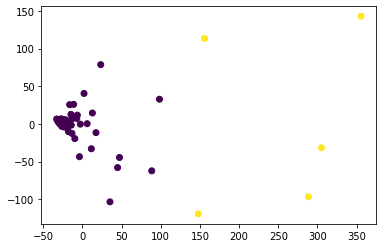

In [ ]:
plt.scatter(data_pca_activationmaps_df_cluster2[0], data_pca_activationmaps_df_cluster2[1] , c=data_pca_activationmaps_df_cluster2['labels_clus2'])
plt.show()

In [ ]:
#https://stackoverflow.com/questions/70050831/plotly-dash-scatter-plot-pointnumber-is-assigned-to-multiple-points-in-hover-da
#https://community.plotly.com/t/how-to-embed-images-into-a-dash-app/61839

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output, no_update
import plotly.express as px


# Setup plotly scatter plot
fig = px.scatter(x= sample1[0], y=sample1[1] , color = sample1['labels_clus2'], labels=dict( x ="Principal Component 1", y ="Principal Component 2") )

fig.update_traces(hoverinfo="none", hovertemplate=None)


# Setup Dash
app = JupyterDash(__name__)
app.layout = html.Div(className="container",
                      children=[dcc.Graph(id="graph-5", figure=fig, clear_on_unhover=True),
                                dcc.Tooltip(id="graph-tooltip-5", direction="bottom")])

@app.callback(Output("graph-tooltip-5", "show"),
              Output("graph-tooltip-5", "bbox"),
              Output("graph-tooltip-5", "children"),
              Input("graph-5", "hoverData"))

def display_hover(hoverData):
    if hoverData is None:
        return False, no_update, no_update
    

    hover_data = hoverData["points"][0]
    bbox = hover_data["bbox"]
    num = hover_data["pointNumber"]

    
    df_row = sample1.iloc[num]
    img_src = df_row['img_url']
   
    children = [
        html.Div([
            html.Img(src=img_src, style={"width": "100%"})
        ], style={'width': '100px', 'white-space': 'normal'})
    ]

    return True, bbox, children

if __name__ == "__main__":
    app.run_server(mode="inline", debug=True)

<IPython.core.display.Javascript object>

In [ ]:
#B = 0 , NB = 1 
actual_labels = [1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]

In [ ]:
sample1['actual_labels'] = actual_labels

In [ ]:
sample1

,0,1,labels_clus2,img_url,actual_labels
63,-25.844269,-0.560272,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
10,98.362022,32.765179,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
21,-31.855484,4.495909,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
5,-14.223552,-1.658837,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
62,-31.142031,4.942739,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
81,-29.552265,2.373574,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
68,6.036935,0.267628,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
24,-26.351423,-1.675156,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
6,-28.617922,1.680608,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
42,155.855377,113.373917,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0


In [ ]:
sample1.to_pickle('/content/drive/MyDrive/sample1_withactual.pkl')

In [ ]:
sample1_withactual = pd.read_pickle('/content/drive/MyDrive/sample1_withactual.pkl')

In [ ]:
# With 3 Clusters

In [ ]:
model = KMeans(n_clusters=3)
model.fit(numarr_activationmaps)
labels_clus3 = model.predict(numarr_activationmaps)

In [ ]:
data_pca_activationmaps_df_cluster3 = data_pca_activationmaps_df
data_pca_activationmaps_df_cluster3['labels_clus3'] = labels_clus3

In [ ]:
data_pca_activationmaps_df_cluster3.to_pickle('/content/drive/MyDrive/data_pca_activationmaps_df_cluster3.pkl')

In [ ]:

data_pca_activationmaps_df_cluster3 = pd.read_pickle('/content/drive/MyDrive/data_pca_activationmaps_df_cluster3.pkl')

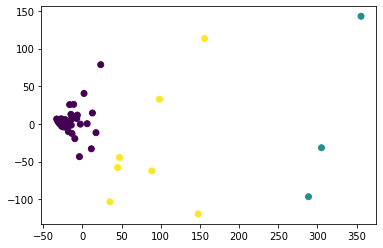

In [ ]:
plt.scatter(data_pca_activationmaps_df_cluster3[0], data_pca_activationmaps_df_cluster3[1] , c=data_pca_activationmaps_df_cluster3['labels_clus3'])
plt.show()

In [ ]:
# Calculate Silhoutte Score
score = silhouette_score(data_pca_activationmaps_df_cluster3,  data_pca_activationmaps_df_cluster3['labels_clus3'] , metric='euclidean')

#range -1 to 1 , 0 means overlapping data , positive means the cluster is dense and well-separated than other clusters , negative means the daa might be wrongly assigned. 
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.787


In [ ]:
data_pca_activationmaps_df_cluster3['img_url'] = display_kmean_activations_img_url

In [ ]:
sample2 = data_pca_activationmaps_df_cluster3.sample(n = 25)

In [ ]:
sample2.to_pickle('/content/drive/MyDrive/sample2.pkl')

In [ ]:
sample2 = pd.read_pickle('/content/drive/MyDrive/sample2.pkl')

In [ ]:
#https://stackoverflow.com/questions/70050831/plotly-dash-scatter-plot-pointnumber-is-assigned-to-multiple-points-in-hover-da
#https://community.plotly.com/t/how-to-embed-images-into-a-dash-app/61839

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output, no_update
import plotly.express as px


# Setup plotly scatter plot
fig = px.scatter(x= sample2[0], y=sample2[1] , color = sample2['labels_clus3'], labels=dict( x ="Principal Component 1", y ="Principal Component 2") )

fig.update_traces(hoverinfo="none", hovertemplate=None)


# Setup Dash
app = JupyterDash(__name__)
app.layout = html.Div(className="container",
                      children=[dcc.Graph(id="graph-5", figure=fig, clear_on_unhover=True),
                                dcc.Tooltip(id="graph-tooltip-5", direction="bottom")])

@app.callback(Output("graph-tooltip-5", "show"),
              Output("graph-tooltip-5", "bbox"),
              Output("graph-tooltip-5", "children"),
              Input("graph-5", "hoverData"))

def display_hover(hoverData):
    if hoverData is None:
        return False, no_update, no_update
    

    hover_data = hoverData["points"][0]
    bbox = hover_data["bbox"]
    num = hover_data["pointNumber"]

    
    df_row = sample2.iloc[num]
    img_src = df_row['img_url']
   
   
    children = [
        html.Div([
            html.Img(src=img_src, style={"width": "100%"})
        ], style={'width': '100px', 'white-space': 'normal'})
    ]

    return True, bbox, children

if __name__ == "__main__":
    app.run_server(mode="inline", debug=True)

<IPython.core.display.Javascript object>

In [ ]:
sample2

,0,1,labels_clus2,labels_clus3,img_url
6,-28.617922,1.680608,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
72,-18.698547,1.000626,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
46,-28.143559,0.713368,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
5,-14.223552,-1.658837,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
79,-26.704552,6.280281,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
48,355.661316,142.938538,1,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
0,-26.042202,2.994179,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
55,-23.921379,-4.105898,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
36,-30.505095,3.694071,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
35,-7.193874,7.209352,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [ ]:
#B=0 , NB = 1 , Only Water = 2 
actual_labels_cluster3 =[0,0,0,0,0,1,1,0,0,2,0 ,1,2,0,0,0,0,0,2,0,0,2,0,0,0]

In [ ]:
sample2['actual_labels_cluster3'] = actual_labels_cluster3

In [ ]:
sample2

,0,1,labels_clus2,labels_clus3,img_url,actual_labels_cluster3
6,-28.617922,1.680608,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
72,-18.698547,1.000626,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
46,-28.143559,0.713368,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
5,-14.223552,-1.658837,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
79,-26.704552,6.280281,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
48,355.661316,142.938538,1,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
0,-26.042202,2.994179,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
55,-23.921379,-4.105898,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
36,-30.505095,3.694071,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
35,-7.193874,7.209352,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2


In [ ]:
sample2.to_pickle('/content/drive/MyDrive/sample2_withactuallabels.pkl')

In [ ]:
sample2_withactuallabels = pd.read_pickle('/content/drive/MyDrive/sample2_withactuallabels.pkl')

In [ ]:
# clusters 4 

In [ ]:
model = KMeans(n_clusters=4)
model.fit(numarr_activationmaps)
labels_clus4 = model.predict(numarr_activationmaps)

In [ ]:
data_pca_activationmaps_df_cluster4 = data_pca_activationmaps_df
data_pca_activationmaps_df_cluster4['labels_clus4'] = labels_clus4

In [ ]:
data_pca_activationmaps_df_cluster4.to_pickle('/content/drive/MyDrive/data_pca_activationmaps_df_cluster4.pkl')

In [ ]:

data_pca_activationmaps_df_cluster4 = pd.read_pickle('/content/drive/MyDrive/data_pca_activationmaps_df_cluster4.pkl')

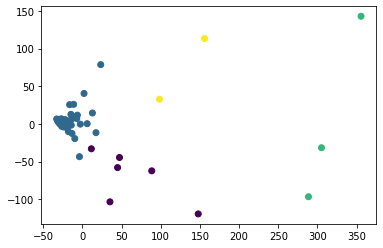

In [ ]:
plt.scatter(data_pca_activationmaps_df_cluster4[0], data_pca_activationmaps_df_cluster4[1] , c=data_pca_activationmaps_df_cluster4['labels_clus4'])
plt.show()

In [ ]:
# Calculate Silhoutte Score
score = silhouette_score(data_pca_activationmaps_df_cluster4,  data_pca_activationmaps_df_cluster4['labels_clus4'] , metric='euclidean')

#range -1 to 1 , 0 means overlapping data , positive means the cluster is dense and well-separated than other clusters , negative means the daa might be wrongly assigned. 
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.774


In [ ]:
data_pca_activationmaps_df_cluster4['img_url'] = display_kmean_activations_img_url

In [ ]:
sample3 = data_pca_activationmaps_df_cluster4.sample(n = 25)

In [ ]:
sample3.to_pickle('/content/drive/MyDrive/sample3.pkl')

In [ ]:
sample3 = pd.read_pickle('/content/drive/MyDrive/sample3.pkl')

In [ ]:
sample3

,0,1,labels_clus2,labels_clus3,labels_clus4,img_url
36,-30.505095,3.694071,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
81,-29.552265,2.373574,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
64,44.886234,-58.022823,0,2,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
13,-29.688059,3.245938,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
49,305.183502,-31.657919,1,1,2,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,-17.800360,-10.316444,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,-24.678165,2.373397,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
74,-22.244839,0.995353,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
22,88.495361,-62.323372,0,2,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
59,2.060761,40.424194,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [ ]:
#https://stackoverflow.com/questions/70050831/plotly-dash-scatter-plot-pointnumber-is-assigned-to-multiple-points-in-hover-da
#https://community.plotly.com/t/how-to-embed-images-into-a-dash-app/61839

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output, no_update
import plotly.express as px


# Setup plotly scatter plot
fig = px.scatter(x= sample3[0], y=sample3[1] , color = sample3['labels_clus4'], labels=dict( x ="Principal Component 1", y ="Principal Component 2") )

fig.update_traces(hoverinfo="none", hovertemplate=None)


# Setup Dash
app = JupyterDash(__name__)
app.layout = html.Div(className="container",
                      children=[dcc.Graph(id="graph-5", figure=fig, clear_on_unhover=True),
                                dcc.Tooltip(id="graph-tooltip-5", direction="bottom")])

@app.callback(Output("graph-tooltip-5", "show"),
              Output("graph-tooltip-5", "bbox"),
              Output("graph-tooltip-5", "children"),
              Input("graph-5", "hoverData"))

def display_hover(hoverData):
    if hoverData is None:
        return False, no_update, no_update
    

    hover_data = hoverData["points"][0]
    bbox = hover_data["bbox"]
    num = hover_data["pointNumber"]

    
    df_row = sample3.iloc[num]
    img_src = df_row['img_url']
   
   
    children = [
        html.Div([
            html.Img(src=img_src, style={"width": "100%"})
        ], style={'width': '100px', 'white-space': 'normal'})
    ]

    return True, bbox, children

if __name__ == "__main__":
    app.run_server(mode="inline", debug=True)

<IPython.core.display.Javascript object>

In [ ]:
sample3

,0,1,labels_clus2,labels_clus3,labels_clus4,img_url
36,-30.505095,3.694071,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
81,-29.552265,2.373574,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
64,44.886234,-58.022823,0,2,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
13,-29.688059,3.245938,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
49,305.183502,-31.657919,1,1,2,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,-17.800360,-10.316444,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,-24.678165,2.373397,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
74,-22.244839,0.995353,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
22,88.495361,-62.323372,0,2,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
59,2.060761,40.424194,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [ ]:
actual_label_cluster4 = [1,1,1,1,2,1,3,1,0,1,1,1,0,1,1,0,1,0,1,0,1,1,1,1,1] 

In [ ]:
sample3['actual_label_cluster4'] = actual_label_cluster4

In [ ]:
sample3.to_pickle('/content/drive/MyDrive/sample3_with_actual_labels.pkl')

In [ ]:
sample3_with_actual_labels = pd.read_pickle('/content/drive/MyDrive/sample3_with_actual_labels.pkl')

In [ ]:
sample3_with_actual_labels

,0,1,labels_clus2,labels_clus3,labels_clus4,img_url,actual_label_cluster4
36,-30.505095,3.694071,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
81,-29.552265,2.373574,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
64,44.886234,-58.022823,0,2,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
13,-29.688059,3.245938,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
49,305.183502,-31.657919,1,1,2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2
2,-17.800360,-10.316444,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
4,-24.678165,2.373397,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,3
74,-22.244839,0.995353,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
22,88.495361,-62.323372,0,2,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
59,2.060761,40.424194,0,0,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1


In [ ]:
#Precision and Recall for cluster 4 

In [ ]:
metrics_data_cluster4 = sample3_with_actual_labels [['labels_clus4' , 'actual_label_cluster4']]

In [ ]:
metrics_data_cluster4

,labels_clus4,actual_label_cluster4
36,1,1
81,1,1
64,0,1
13,1,1
49,2,2
2,1,1
4,1,3
74,1,1
22,0,0
59,1,1


In [ ]:
precision_score(metrics_data_cluster4['actual_label_cluster4'], metrics_data_cluster4['labels_clus4'], average='macro')

0.5773809523809523

In [ ]:
recall_score(metrics_data_cluster4['actual_label_cluster4'], metrics_data_cluster4['labels_clus4'] ,average='macro')

0.5361111111111111

In [ ]:
# Precision and recall for cluster 3 

In [ ]:
sample2_withactuallabels

,0,1,labels_clus2,labels_clus3,img_url,actual_labels_cluster3
6,-28.617922,1.680608,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
72,-18.698547,1.000626,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
46,-28.143559,0.713368,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
5,-14.223552,-1.658837,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
79,-26.704552,6.280281,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
48,355.661316,142.938538,1,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
0,-26.042202,2.994179,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
55,-23.921379,-4.105898,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
36,-30.505095,3.694071,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
35,-7.193874,7.209352,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2


In [ ]:
metrics_data_cluster3 = sample2_withactuallabels [['labels_clus3' , 'actual_labels_cluster3']]

In [ ]:
metrics_data_cluster3.head(3)

,labels_clus3,actual_labels_cluster3
6,0,0
72,0,0
46,0,0


In [ ]:
precision_score(metrics_data_cluster3['actual_labels_cluster3'], metrics_data_cluster3['labels_clus3'], average='macro')

0.7698412698412698

In [ ]:
recall_score(metrics_data_cluster3['actual_labels_cluster3'], metrics_data_cluster3['labels_clus3'] ,average='macro')

0.6203703703703703

In [ ]:
# Precision and recall for cluster 2

In [ ]:
sample1_withactual

,0,1,labels_clus2,img_url,actual_labels
63,-25.844269,-0.560272,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
10,98.362022,32.765179,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
21,-31.855484,4.495909,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
5,-14.223552,-1.658837,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
62,-31.142031,4.942739,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
81,-29.552265,2.373574,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
68,6.036935,0.267628,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
24,-26.351423,-1.675156,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
6,-28.617922,1.680608,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
42,155.855377,113.373917,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0


In [ ]:
metrics_data_cluster2 = sample1_withactual [['labels_clus2' , 'actual_labels']]

In [ ]:
metrics_data_cluster2.head(3)

,labels_clus2,actual_labels
63,0,1
10,0,0
21,0,1


In [ ]:
precision_score(metrics_data_cluster2['actual_labels'], metrics_data_cluster2['labels_clus2'], average='macro')

0.6847826086956521

In [ ]:
recall_score(metrics_data_cluster2['actual_labels'], metrics_data_cluster2['labels_clus2'] ,average='macro')

0.6011904761904762

In [ ]:
#Cluster three performed better so sampling for images to see the precision score

In [ ]:
data_pca_activationmaps_df_cluster3 = pd.read_pickle('/content/drive/MyDrive/data_pca_activationmaps_df_cluster3.pkl')

In [ ]:
len(data_pca_activationmaps_df_cluster3)

85

In [ ]:
sample2_withactuallabels.head(5)

,0,1,labels_clus2,labels_clus3,img_url,actual_labels_cluster3
6,-28.617922,1.680608,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
72,-18.698547,1.000626,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
46,-28.143559,0.713368,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
5,-14.223552,-1.658837,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
79,-26.704552,6.280281,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0


In [ ]:
display_kmean_activations_img_url

,0
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...
80,<PIL.JpegImagePlugin.JpegImageFile image mode=...
81,<PIL.JpegImagePlugin.JpegImageFile image mode=...
82,<PIL.JpegImagePlugin.JpegImageFile image mode=...
83,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [ ]:
data_pca_activationmaps_df_cluster3['img_url'] = display_kmean_activations_img_url

In [ ]:
data_pca_activationmaps_df_cluster3

,0,1,labels_clus2,labels_clus3,img_url
0,-26.042202,2.994179,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,-21.637129,2.161066,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,-17.800360,-10.316444,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,-25.892292,3.292757,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,-24.678165,2.373397,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...,...,...,...
80,147.834183,-119.522797,1,2,<PIL.JpegImagePlugin.JpegImageFile image mode=...
81,-29.552265,2.373574,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
82,-31.807230,5.637414,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
83,35.168541,-103.497444,0,2,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [ ]:
sample_30_cluster3 = data_pca_activationmaps_df_cluster3.sample(n = 55)

In [ ]:
sample_30_cluster3

,0,1,labels_clus2,labels_clus3,img_url
29,-24.361053,-0.220907,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
76,-26.620565,6.600949,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
35,-7.193874,7.209352,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
13,-29.688059,3.245938,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
21,-31.855484,4.495909,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
43,-19.249975,-5.129971,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
18,-6.470155,11.652552,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
14,17.308586,-11.631209,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
15,-30.331614,3.113996,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
83,35.168541,-103.497444,0,2,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [ ]:
#changing name to
sample_55_cluster = sample_30_cluster3

In [ ]:
sample_55_cluster.shape

(55, 5)

In [ ]:
sample_55_cluster.to_pickle('/content/drive/MyDrive/sample_55_cluster.pkl')

In [ ]:
sample_55_cluster = pd.read_pickle('/content/drive/MyDrive/sample_55_cluster.pkl')

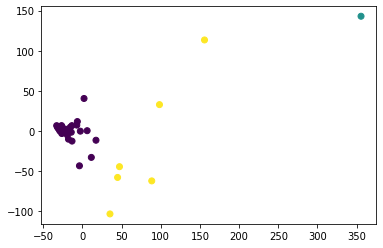

In [ ]:
plt.scatter(sample_55_cluster[0], sample_55_cluster[1] ,c=sample_55_cluster['labels_clus3'])
plt.show()

In [ ]:
#creating actual labels for 50images

In [ ]:
actual_labels_cluster3_50images = [ 0,0,2,0,2,2,0,2,2,1,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,2,2,0,0,2,0,1,0,0,0,2,0,0,2,2,0,0,0,2,0,0,2,0,0]

In [ ]:
len(actual_labels_cluster3_50images)

55

In [ ]:
sample_55_cluster['actual_labels_cluster3_50images'] = actual_labels_cluster3_50images

In [ ]:
sample_55_cluster

,0,1,labels_clus2,labels_clus3,img_url,actual_labels_cluster3_50images
29,-24.361053,-0.220907,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
76,-26.620565,6.600949,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
35,-7.193874,7.209352,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2
13,-29.688059,3.245938,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
21,-31.855484,4.495909,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2
43,-19.249975,-5.129971,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2
18,-6.470155,11.652552,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
14,17.308586,-11.631209,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2
15,-30.331614,3.113996,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2
83,35.168541,-103.497444,0,2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1


In [ ]:
sample_55_cluster.to_pickle('/content/drive/MyDrive/sample_55_cluster_actual_labels.pkl')

In [ ]:
sample_55_cluster_with_actual_labels =  pd.read_pickle('/content/drive/MyDrive/sample_55_cluster_actual_labels.pkl')

In [ ]:
#Calculate precision and accuracy for 50 images

In [ ]:
sample_55_cluster_with_actual_labels_metrics = sample_55_cluster_with_actual_labels [['labels_clus3' , 'actual_labels_cluster3_50images']]

In [ ]:
sample_55_cluster_with_actual_labels_metrics

,labels_clus3,actual_labels_cluster3_50images
29,0,0
76,0,0
35,0,2
13,0,0
21,0,2
43,0,2
18,0,0
14,0,2
15,0,2
83,2,1


In [ ]:
precision_score(sample_55_cluster_with_actual_labels_metrics['actual_labels_cluster3_50images'], sample_55_cluster_with_actual_labels_metrics['labels_clus3'], average='macro')

0.7430555555555555

In [ ]:
recall_score(sample_55_cluster_with_actual_labels_metrics['actual_labels_cluster3_50images'], sample_55_cluster_with_actual_labels_metrics['labels_clus3'] ,average='macro')

0.544481981981982

In [ ]:
#Display images to validate the class accuracy 

In [ ]:
#Building - 0 , Non Building - 2 , Only Sand - 1 

In [ ]:
#The below index shows building and the model predicted building

In [ ]:
sample_55_cluster_with_actual_labels_metrics.loc[29]

labels_clus3                       0
actual_labels_cluster3_50images    0
Name: 29, dtype: int64

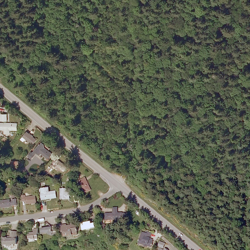

In [ ]:
sample_55_cluster_with_actual_labels.img_url[29].resize((250, 250))

In [ ]:
sample_55_cluster_with_actual_labels_metrics.loc[13]

labels_clus3                       0
actual_labels_cluster3_50images    0
Name: 13, dtype: int64

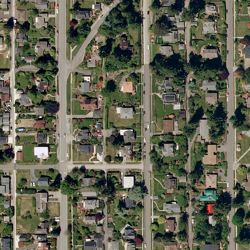

In [ ]:
sample_55_cluster_with_actual_labels.img_url[13].resize((250, 250))

In [ ]:
sample_55_cluster_with_actual_labels_metrics.loc[48]

labels_clus3                       1
actual_labels_cluster3_50images    1
Name: 48, dtype: int64

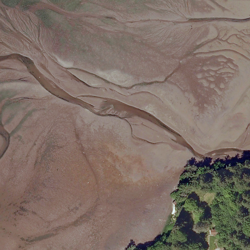

In [ ]:
sample_55_cluster_with_actual_labels.img_url[48].resize((250, 250))

In [ ]:
sample_55_cluster_with_actual_labels_metrics.loc[42]

labels_clus3                       2
actual_labels_cluster3_50images    2
Name: 42, dtype: int64

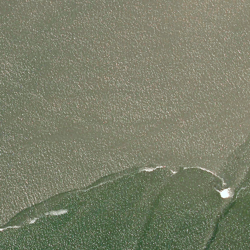

In [ ]:
sample_55_cluster_with_actual_labels.img_url[42].resize((250, 250))

In [ ]:
#wrongly predicted 

In [ ]:
sample_55_cluster_with_actual_labels_metrics.loc[35]

labels_clus3                       0
actual_labels_cluster3_50images    2
Name: 35, dtype: int64

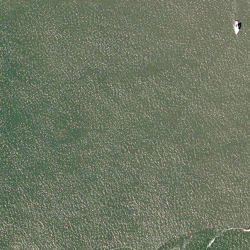

In [ ]:
sample_55_cluster_with_actual_labels.img_url[35].resize((250, 250))

In [ ]:
sample_55_cluster_with_actual_labels_metrics.loc[38]

labels_clus3                       0
actual_labels_cluster3_50images    2
Name: 38, dtype: int64

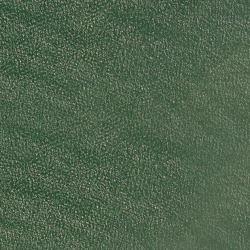

In [ ]:
sample_55_cluster_with_actual_labels.img_url[38].resize((250, 250))

In [ ]:
sample_55_cluster_with_actual_labels_metrics.loc[10]

labels_clus3                       2
actual_labels_cluster3_50images    0
Name: 10, dtype: int64

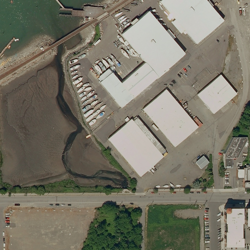

In [ ]:
sample_55_cluster_with_actual_labels.img_url[10].resize((250, 250))

In [ ]:
sample_55_cluster_with_actual_labels_metrics.loc[19]

labels_clus3                       0
actual_labels_cluster3_50images    2
Name: 19, dtype: int64

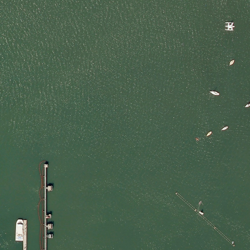

In [ ]:
sample_55_cluster_with_actual_labels.img_url[19].resize((250, 250))